In [2]:
%matplotlib inline
import torch
import numpy as np 
from d2l import torch as d2l

### 坐标格式

In [3]:
def bbox_to_rect(bbox, color):
# ((左上x,左上y),宽,⾼)
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2], height=bbox[3],
        fill=False, edgecolor=color, linewidth=2)

In [4]:
import json

def read_json(path):
    with open(path, 'r') as f:
        for line in f:
            temp = json.loads(line)        
    
    return temp

In [12]:
def Get(data_json, req):
    for i in req:
        print(data_json[i],'\n')

### 画一个

What is the content of the element at the top of the stack? 

{'d': '77', 'c': '30', 'b': '92', 'a': '10'} 

d 



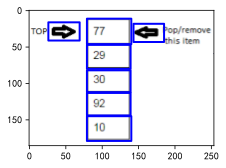

In [22]:
def draw(index, img, cords): 
    
    d2l.set_figsize()
    fig = d2l.plt.imshow(img)
    for i in cords:
        fig.axes.add_patch(bbox_to_rect(i,'blue'))

        
path = './Q.json'
data_json = read_json(path)

index = str(7)
iname = data_json[index]['diagram_path'].split("\\")[-1]
img = d2l .plt.imread('./Diagrams/' + iname)
cords = data_json[index]['cords']

Get(data_json[index],['question', 'answer', 'correct_answer'])
draw(index, img, cords)

### 画多个

In [6]:
import os
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体支持

The middle value of the list is? 

There are 7 values in the current list. 

What is the top element of the stack? 

A pop operation will be performed. 

Which element will the Top element point to? 

Element 30 cannot be popped out of the stack before element 92. 

What is the content of the element at the top of the stack? 

A pop operation will be performed. 

Which element will the Top element point to? 

Element 29 cannot be popped out of the stack before element 92. 

How many elements are in the stack? 

The stack will be empty after pop operation. 

Which element will the Top element point to after a pop operation? 

Element 10 cannot be popped out of the stack before element 92. 

How many elements are in the stack? 

This is an empty stack. 

How many elements are in the stack after a push operation? 

The pop operation cannot be performed now. 

What is the element just pushed into the stack? 

a is the bottom element of the stack. 

At least how many pop operations are need

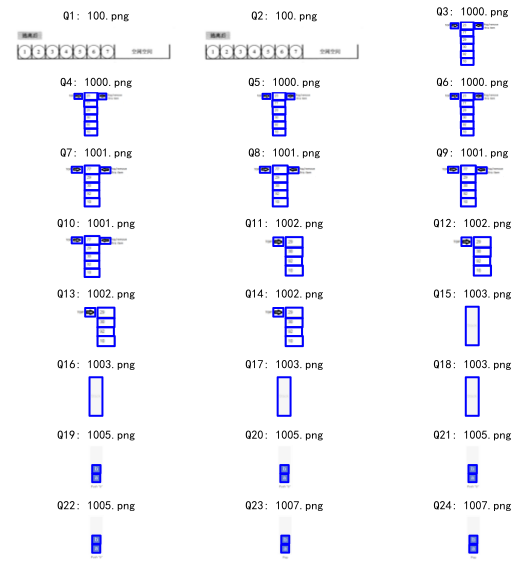

<Figure size 1440x1440 with 0 Axes>

In [20]:
ind = 1
colum = int(len(data_json)/4)

fig, axes = plt.subplots(8, 3, figsize=(8, 8), tight_layout=1)
fig = plt.figure(figsize = (20,20))  # 画布大小，单位英寸（/72pix）

for row in range(8):
    for col in range(3):
        index = str(ind)
        iname = data_json[index]['diagram_path'].split("\\")[-1]
        img = d2l.plt.imread('./Diagrams/' + iname)
        cords = data_json[index]['cords']
        axes[row, col].imshow(img)
        for i in cords:
            axes[row, col].axes.add_patch(bbox_to_rect(i,'blue'))
        axes[row, col].axis('off')  # 去坐标
        axes[row, col].set_title(f'Q{index}: {iname}')
        ind += 1
        Get(data_json[index],['question'])
        
plt.show()